# Document Loading

## Note to students.
During periods of high load you may find the notebook unresponsive. It may appear to execute a cell, update the completion number in brackets [#] at the left of the cell but you may find the cell has not executed. This is particularly obvious on print statements when there is no output. If this happens, restart the kernel using the command under the Kernel tab.

## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

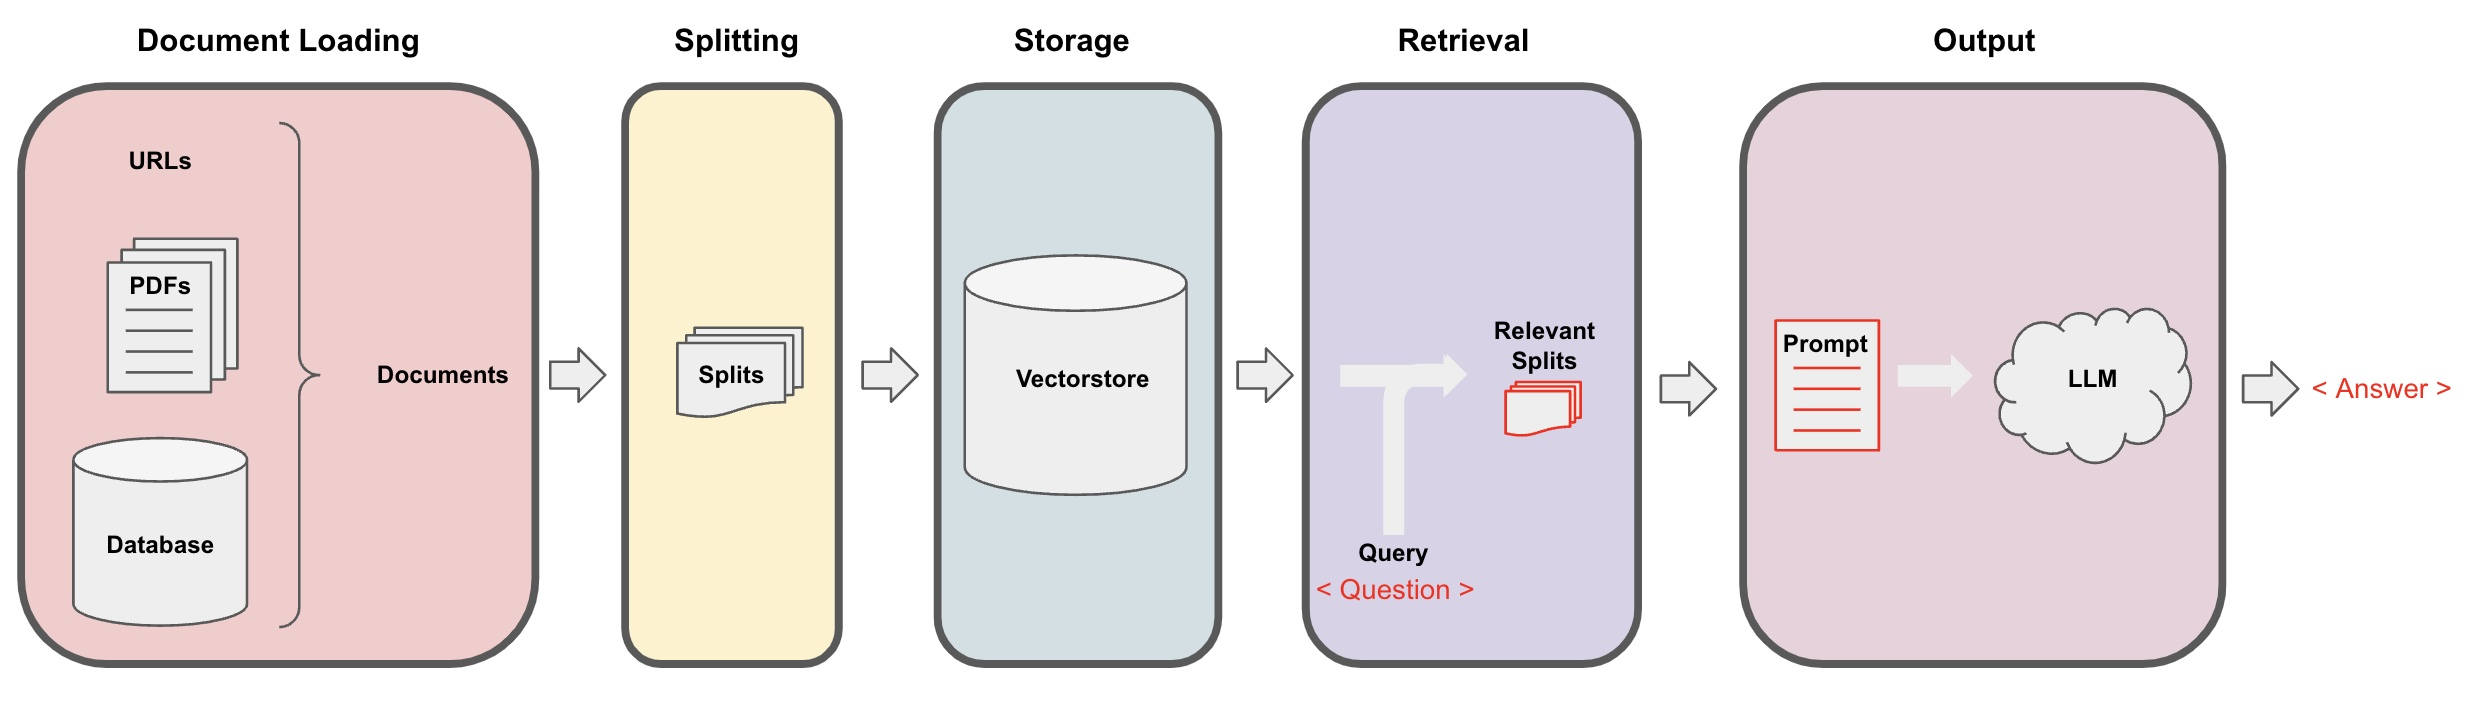

In [1]:
#! pip install langchain

In [2]:
l = 'alaxbxsjkaab'
print(set(l), {l})

{'x', 'j', 'l', 's', 'a', 'k', 'b'} {'alaxbxsjkaab'}


In [1]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

AZURE_OPENAI_ENDPOINT_GPT = os.getenv('AZURE_OPENAI_ENDPOINT_GPT')
AZURE_OPENAI_ENDPOINT_EMBEDDING = os.getenv('AZURE_OPENAI_ENDPOINT_EMBEDDING')
AZURE_OPENAI_API_KEY = os.getenv('AZURE_OPENAI_API_KEY')
AZURE_OPENAI_API_VERSION = os.getenv('AZURE_OPENAI_API_VERSION')
OPENAI_MODEL_NAME = os.getenv('OPENAI_MODEL_NAME')
OPENAI_GPT4_TURBO_ENGINE = os.getenv('OPENAI_GPT4_TURBO_ENGINE')

In [2]:
# import os
# import openai
# import sys
# sys.path.append('../..')

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file

# AZURE_OPENAI_API_KEY = os.getenv('AZURE_OPENAI_API_KEY')

## PDFs

Let's load a PDF [transcript](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf) from Andrew Ng's famous CS229 course! These documents are the result of automated transcription so words and sentences are sometimes split unexpectedly.

In [3]:
# The course will show the pip installs you would need to install packages on your own machine.
# These packages are already installed on this platform and should not be run again.
#! pip install pypdf 

In [3]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [4]:
len(pages)

22

In [5]:
page = pages[0]

In [6]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is just spend a little time going over the logistics 
of the class, and then we'll start to talk a bit about machine learning.  
By way of introduction, my name's Andrew Ng and I'll be instructor for this class. And so 
I personally work in machine learning, and I've worked on it for about 15 years now, and 
I actually think that machine learning is the 


In [7]:
page.metadata

{'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

In [8]:
from langchain.document_loaders import PyPDFLoader

# First we create the loader with the pdf we wanna load

loader = PyPDFLoader("DATASET-Prospectos/PDF/001_ADZYNMA.pdf")
print('loader value: '+ str(loader))
pages = loader.load()
page_1 = pages[10]

loader value: <langchain_community.document_loaders.pdf.PyPDFLoader object at 0x7fbc32afa2c0>


In [9]:
page_1

Document(metadata={'source': 'DATASET-Prospectos/PDF/001_ADZYNMA.pdf', 'page': 10}, page_content='11 \nTabla 3: Parámetros farmacocinéticos de la actividad ADAMTS13 después de la administración \nintravenosa de ADZYNMA en pacientes con PTT \n \nParámetro \n(unidad) \nMedia (DE) \nmín; máx \n(N = 83) \nCmáx \n(UI/ml) \n1,13 (0,29) \n0,72; 2,29 \nABC \n(UI*h/ml) \n72,8 (37,4) \n38,7; 274 \nDuración de la actividad ADAMTS13 por \nencima del 10 % \n(días) \n8,85 (2,45) \n4,51; 14,0 \nABC = área bajo la curva de actividad ADAMTS13 frente a tiempo; Cmáx = actividad máxima de \nADAMTS13. \nNota: 1 UI/ml de actividad ADAMTS13 se corresponde con el 100 % de la actividad normal \npromedio. \n \nLa administración intravenosa de 40 UI/kg de ADZYNMA produjo exposiciones a una actividad \nADAMTS13 aproximadamente 5 veces superior (Cmáx, ABC y duración de la actividad ADAMTS13 \npor encima del 10 %) y una menor variabilidad en comparación con los tratamientos basados en \nplasma. \n \nPoblaciones esp

In [10]:
page_1.page_content[20:100]

'ros farmacocinéticos de la actividad ADAMTS13 después de la administración \nintr'

## YouTube

In [2]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [5]:
#! pip install yt_dlp
#! pip install pydub
#!pip install youtube_transcript_api

**Note**: This can take several minutes to complete.

In [11]:
from youtube_transcript_api import YouTubeTranscriptApi
url="https://www.youtube.com/watch?v=l4H95gUtzZk"
vid_id = url.split('v=')[1]

transcript = YouTubeTranscriptApi.get_transcript(vid_id)

TranscriptsDisabled: 
Could not retrieve a transcript for the video https://www.youtube.com/watch?v=l4H95gUtzZk! This is most likely caused by:

Subtitles are disabled for this video

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are using and provide the information needed to replicate the error. Also make sure that there are no open issues which already describe your problem!

In [7]:
vid_id

'KgoJIKG5mUU'

In [3]:
url="https://www.youtube.com/watch?v=KgoJIKG5mUU"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=KgoJIKG5mUU
[youtube] KgoJIKG5mUU: Downloading webpage
[youtube] KgoJIKG5mUU: Downloading ios player API JSON
[youtube] KgoJIKG5mUU: Downloading mweb player API JSON


ERROR: [youtube] KgoJIKG5mUU: Sign in to confirm you’re not a bot. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


DownloadError: ERROR: [youtube] KgoJIKG5mUU: Sign in to confirm you’re not a bot. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies

In [ ]:
docs[0].page_content[0:500]

## URLs

In [34]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://es.wikipedia.org/wiki/Fernando_Alonso")

In [22]:
#!pip install beautifulsoup4

In [35]:
docs = loader.load()

In [40]:
#delete all the inecessary double blank spaces
wiki_Fernando_Alonso = docs[0].page_content.replace('  ','')
wiki_Fernando_Alonso = wiki_Fernando_Alonso.replace('\n','')

In [41]:
wiki_Fernando_Alonso

'Fernando Alonso - Wikipedia, la enciclopedia libreIr al contenidoMenú principalMenú principalmover a la barra lateralocultar\t\tNavegación\tPortadaPortal de la comunidadActualidadCambios recientesPáginas nuevasPágina aleatoriaAyudaNotificar un errorBuscarBuscarAparienciaDonacionesCrear una cuentaAccederHerramientas personalesDonaciones Crear una cuenta Acceder\t\tPáginas para editores desconectados más informaciónContribucionesDiscusiónContenidosmover a la barra lateralocultarInicio1TrayectoriaAlternar subsección Trayectoria1.1Inicios1.2Fórmula 11.2.1Minardi (2001)1.2.1.12001: Debut en Fórmula 11.2.2Renault (2002-2006)1.2.2.12002: Piloto probador1.2.2.22003: Primera victoria1.2.2.32004: Año de confirmación1.2.2.42005: El primer título1.2.2.52006: De nuevo campeón1.2.3McLaren (2007)1.2.3.12007: tercero en un año lleno de polémicas1.2.4Renault (2008-2009)1.2.5Ferrari (2010-2014)1.2.5.12010: subcampeón en el debut con Ferrari1.2.5.22011: segunda temporada en Ferrari e imposibilidad de lu

## Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.
 

![image.png](./img/image.png)

Productivity tool:

Notion is a productivity tool that combines note-taking, project management, and database functionalities12. It is a flexible platform that allows users to create and organize their workspace according to their needs. Developed by Notion Labs, Inc., it is available as an online-only application with both free and paid subscriptions3.

In [12]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()

In [13]:
print(docs[0].page_content[0:200])

# Blendle's Employee Handbook

This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that


In [14]:
docs[0].metadata

{'source': "docs/Notion_DB/Blendle's Employee Handbook e367aa77e225482c849111687e114a56.md"}